<a href="https://colab.research.google.com/github/anuskhattak/Student-score-prediction/blob/main/ml_project_student_prediction_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [ ]:
df = pd.read_csv('/content/StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
df.shape

(6607, 20)

In [ ]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df['Teacher_Quality'] = df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0])
df['Distance_from_Home'] = df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0])
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])

In [ ]:
df.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
# Label Encoding columns
print(df['Extracurricular_Activities'].unique())
print(df['Internet_Access'].unique())
print(df['Learning_Disabilities'].unique())
print(df['Gender'].unique())


['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Male' 'Female']


In [ ]:
categ_cols = ['Extracurricular_Activities', 'Internet_Access',
              'Learning_Disabilities', 'Gender']

le = LabelEncoder()
for col in categ_cols:
  df[col] = le.fit_transform(df[col])

In [ ]:
# Manual Encoding columns
print(df['Teacher_Quality'].unique())
print(df['Family_Income'].unique())
print(df['Motivation_Level'].unique())
print(df['Access_to_Resources'].unique())
print(df['Parental_Involvement'].unique())
print(df['Peer_Influence'].unique())

['Medium' 'High' 'Low']
['Low' 'Medium' 'High']
['Low' 'Medium' 'High']
['High' 'Medium' 'Low']
['Low' 'Medium' 'High']
['Positive' 'Negative' 'Neutral']


In [ ]:
ordinal_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
rank_cols = ['Teacher_Quality','Family_Income' ,'Motivation_Level' ,'Access_to_Resources'
             , 'Parental_Involvement']

for col in rank_cols:
  df[col] = df[col].map(ordinal_mapping)

In [ ]:
education_mapping = {
    'High School': 1,
    'College': 2,
    'Postgraduate': 3
}

df['Parental_Education_Level'] = df['Parental_Education_Level'].map(education_mapping)

In [ ]:
Peer_Influence_mapping = {
    'Negative': -1,
    'Neutral': 0,
    'Positive': 1
}
df['Peer_Influence'] = df['Peer_Influence'].map(Peer_Influence_mapping)

In [ ]:
distance_mapping = {
    'Near': 1,
    'Moderate': 2,
    'Far': 3
}

df['Distance_from_Home'] = df['Distance_from_Home'].map(distance_mapping)

In [ ]:
school_type_mapping = {
    'Public': 1,
    'Private': 2
}
df['School_Type'] = df['School_Type'].map(school_type_mapping)

Correaletion

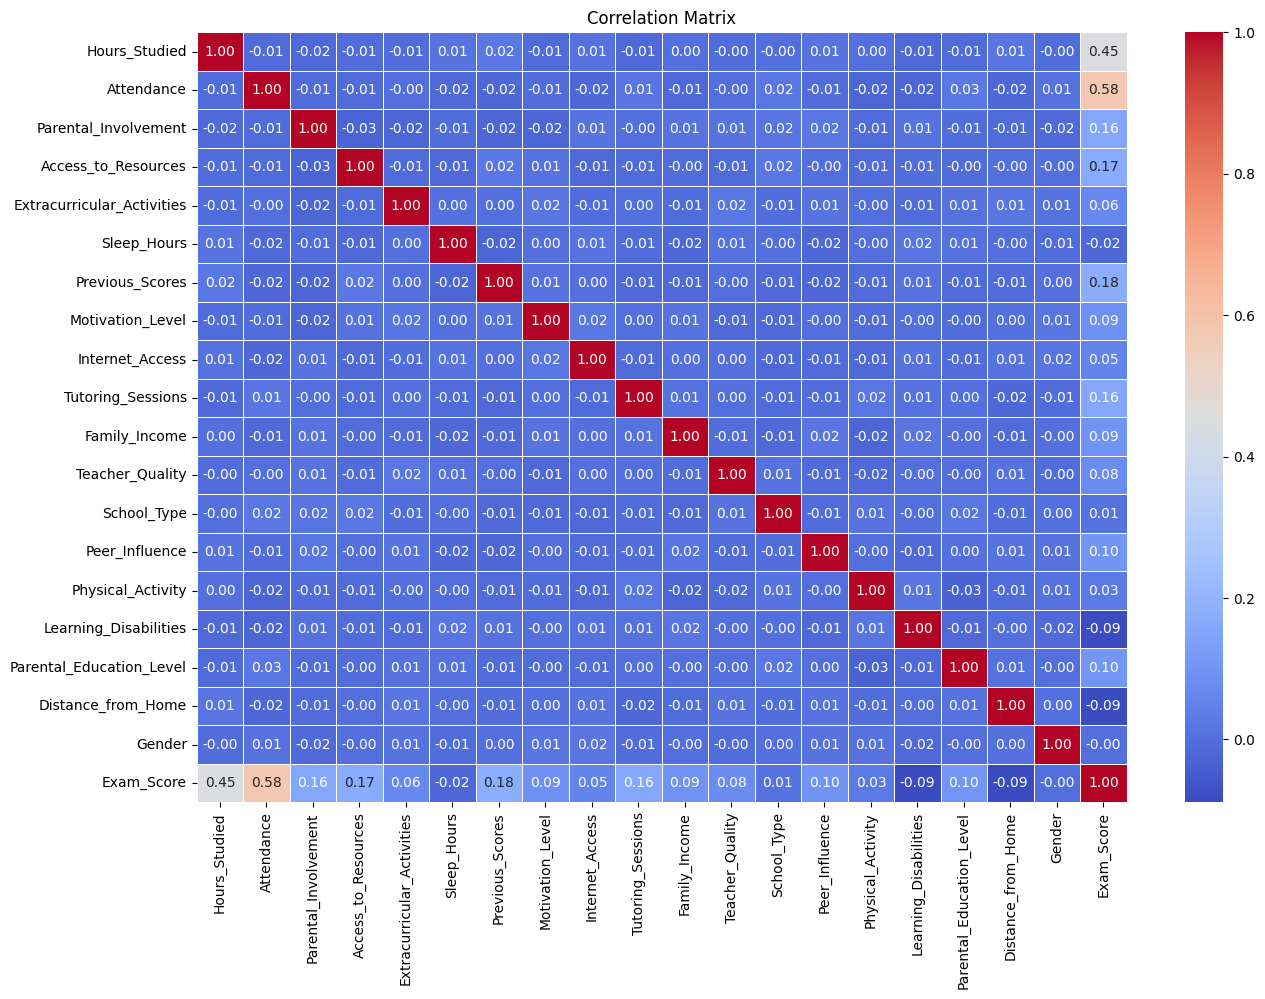

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

ML Part

In [ ]:
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(f"R2_Score: {r2_score(y_test, y_pred): .2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f} marks")

R2_Score:  0.77
Mean Absolute Error: 0.44 marks


In [ ]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head(10))

      Actual  Predicted
743       65  64.618136
5551      65  65.287803
3442      71  71.513780
6571      64  64.300854
4204      66  66.418328
2516      66  66.567820
4047      72  72.513104
1706      66  66.373882
1075      70  69.997084
233       70  70.041592
